# Monitoreo y pronóstico de clorofila-a en zonas costeras utilizando datos del servicio Copernicus Marine Environment Monitoring Service (CMEMS)

Este código permite monitorear y pronosticar la concentración de clorofila-a en zonas costeras utilizando datos satelitales proporcionados por el servicio **Copernicus Marine Environment Monitoring Service (CMEMS).** 

El catálogo de diferentes datasets está disponible en: [https://marine.copernicus.eu/](https://marine.copernicus.eu/) y para poder acceder y descargar los datos es necesario registrarse gratuitamente en la plataforma.

Para acceder a los datos se utiliza Copernicus Marine Toolbox con su API en python, medienta la libreria `copernicusmarine`. Además se utilizan bibliotecas como `xarray`, `matplotlib` y `cartopy` para la manipulación de datos y la visualización geoespacial.

**Importante:** la libreria `copernicusmarine` permite hacer login interactivo y también automatizado. En este caso se utiliza el login automatizado mediante un archivo de configuración de credenciales, si no se tiene es necesario crearlo en el directorio de trabajo, la misma libreria permite generarlo: 
```python
import copernicusmarine
copernicusmarine.login()
```

In [2]:
# Se importan las librerias neecesarias
import copernicusmarine
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from datetime import datetime, timedelta
import logging
logging.getLogger("copernicusmarine").setLevel(logging.ERROR)

**Descargamos los datos de clorofila-a satelitales y de pronóstico para una región costera específica.** 

Los datasets utilizados son:
- **Observaciones:** [Global Ocean Colour (Copernicus-GlobColour)](https://data.marine.copernicus.eu/product/OCEANCOLOUR_GLO_BGC_L4_NRT_009_102/description), Bio-Geo-Chemical, L4 (monthly and interpolated) from Satellite Observations (Near Real Time) 
- **Pronóstico:** [Global Ocean Biogeochemistry Analysis and Forecast](https://data.marine.copernicus.eu/product/GLOBAL_ANALYSISFORECAST_BGC_001_028/description).

Se seleccionan las últimas 3 fechas disponibles para observación (día anterior al actual es la más reciente) y 3 tiempos de pronóstico (el dia actual es el primer tiempo).

In [3]:
# Definición de fechas y nombres de archivos

today = datetime.today()

dateinifcst = (today).strftime("%Y-%m-%dT00:00:00")
dateendfcst = (today + timedelta(days=2)).strftime("%Y-%m-%dT00:00:00")
dateiniobs  = (today - timedelta(days=3)).strftime("%Y-%m-%dT00:00:00")
dateendobs  = (today - timedelta(days=1)).strftime("%Y-%m-%dT00:00:00")

filenamefcst = today.strftime("%Y%m%d_chlo_fcst.nc")
filenameobs  = today.strftime("%Y%m%d_chlo_obs.nc")

Se ingresan las coordenadas geográficas de la región costera de interés, además de un nombre descriptivo para la misma (evitar espacios).

In [4]:
min_lon=-92
max_lon=-87
min_lat=10
max_lat=15

region = "El Salvador"
nombre_salida = "template_clorofila"

Se descargan los datasets en formato netCDF y se almacenan en un directorio local para su posterior análisis y visualización. Los archivos se renombran de acuerdo a la fecha actual en el formato `YYYYMMDD_chlo_fcst.nc` (pronóstico) y `YYYYMMDD_chlo_obs.nc` (observación).

In [5]:
copernicusmarine.subset(
  dataset_id="cmems_mod_glo_bgc-pft_anfc_0.25deg_P1D-m",
  dataset_version="202311",
  variables=["chl"],
  minimum_longitude=min_lon,
  maximum_longitude=max_lon,
  minimum_latitude=min_lat,
  maximum_latitude=max_lat,
  start_datetime=dateinifcst,
  end_datetime=dateendfcst,
  minimum_depth=0.4940253794193268,
  maximum_depth=0.4940253794193268,
  coordinates_selection_method="strict-inside",
  netcdf_compression_level=9,
  disable_progress_bar=True,
  output_filename=filenamefcst,
  output_directory="./data",
  overwrite=True,
  credentials_file="./.copernicusmarine-credentials"
)

ResponseSubset(file_path=WindowsPath('data/20251020_chlo_fcst.nc'), output_directory=WindowsPath('data'), filename='20251020_chlo_fcst.nc', file_size=0.018049618320610687, data_transfer_size=2.423206106870229, variables=['chl'], coordinates_extent=[GeographicalExtent(minimum=-92.0, maximum=-87.0, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=10.0, maximum=15.0, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-10-20T00:00:00+00:00', maximum='2025-10-22T00:00:00+00:00', unit='iso8601', coordinate_id='time'), GeographicalExtent(minimum=0.4940253794193268, maximum=0.4940253794193268, unit='m', coordinate_id='depth')], status=<StatusCode.SUCCESS: '000'>, message=<StatusMessage.SUCCESS: 'The request was successful.'>, file_status=<FileStatus.OVERWRITTEN: 'OVERWRITTEN'>)

In [6]:
copernicusmarine.subset(
  dataset_id="cmems_obs-oc_glo_bgc-plankton_nrt_l4-gapfree-multi-4km_P1D",
  dataset_version="202311",
  variables=["CHL"],
  minimum_longitude=min_lon,
  maximum_longitude=max_lon,
  minimum_latitude=min_lat,
  maximum_latitude=max_lat,
  start_datetime=dateiniobs,
  end_datetime=dateendobs,
  coordinates_selection_method="strict-inside",
  netcdf_compression_level=9,
  disable_progress_bar=True,
  output_filename=filenameobs,
  output_directory="./data",
  overwrite=True,
  credentials_file="./.copernicusmarine-credentials"
)

ResponseSubset(file_path=WindowsPath('data/20251020_chlo_obs.nc'), output_directory=WindowsPath('data'), filename='20251020_chlo_obs.nc', file_size=0.17788549618320612, data_transfer_size=1.2506870229007634, variables=['CHL'], coordinates_extent=[GeographicalExtent(minimum=-91.97916412353516, maximum=-87.02082824707031, unit='degrees_east', coordinate_id='longitude'), GeographicalExtent(minimum=10.020831108093262, maximum=14.979164123535156, unit='degrees_north', coordinate_id='latitude'), TimeExtent(minimum='2025-10-17T00:00:00+00:00', maximum='2025-10-19T00:00:00+00:00', unit='iso8601', coordinate_id='time')], status=<StatusCode.SUCCESS: '000'>, message=<StatusMessage.SUCCESS: 'The request was successful.'>, file_status=<FileStatus.OVERWRITTEN: 'OVERWRITTEN'>)

Se generan los gráficos comparativos de concentración de clorofila-a para las fechas seleccionadas, mostrando tanto las observaciones satelitales como los pronósticos del modelo. Los gráficos incluyen mapas geoespaciales con proyecciones cartográficas adecuadas y barras de color para interpretar los niveles de clorofila-a.

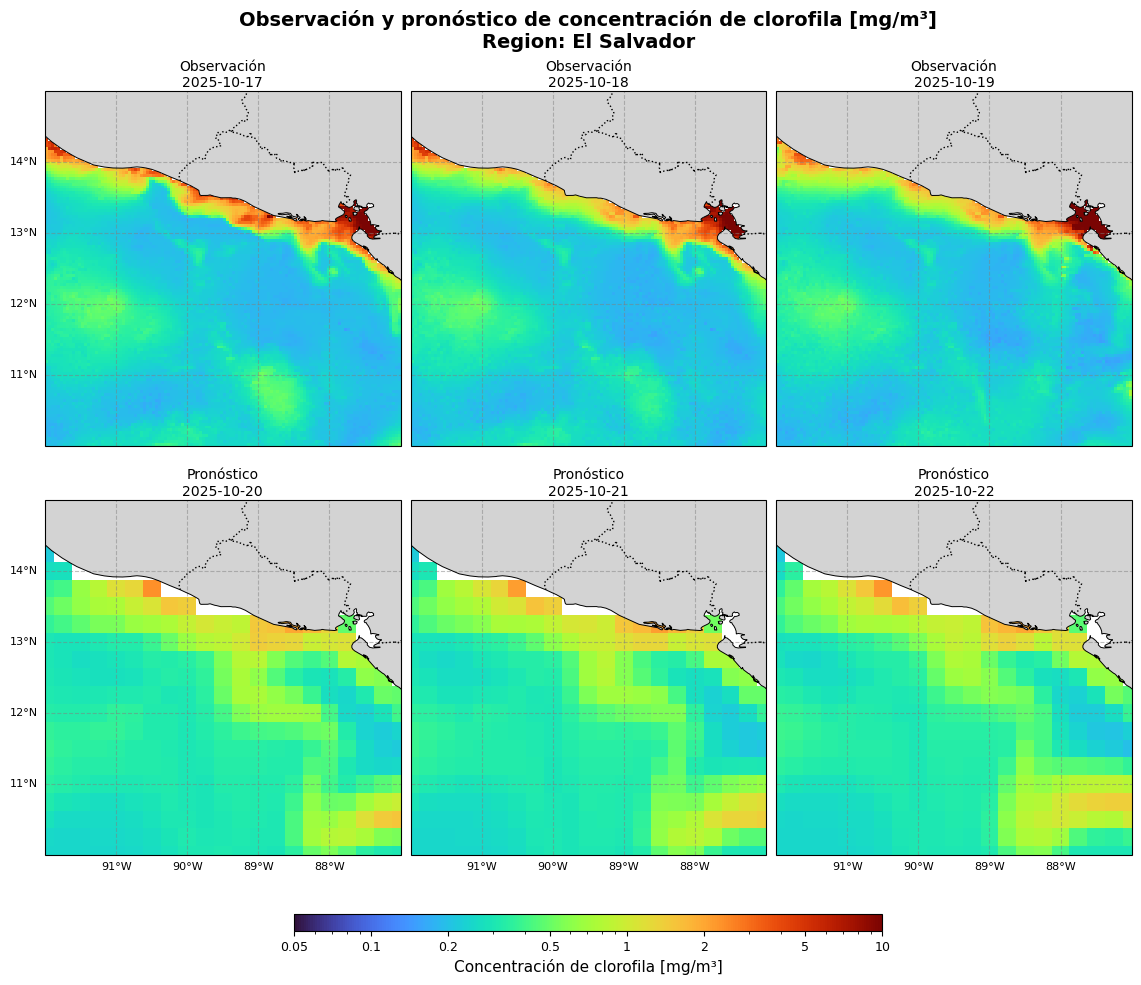

In [7]:
# Parametros de los mapas
extent = [min_lon, max_lon, min_lat, max_lat]

# Parámetros de la visualización, utilizamos una escala logarítmica para clorofila
cmap = 'turbo'
vmin, vmax = 0.05, 10
norm = mcolors.LogNorm(vmin=vmin, vmax=vmax)
ticks = [0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]

# Abrimos los datasets
ds_fcst = xr.open_dataset(f"./data/{filenamefcst}")
ds_obs  = xr.open_dataset(f"./data/{filenameobs}")

# Nombres de variables
var_fcst = 'chl'
var_obs  = 'CHL'

# Tiempos
times_fcst = ds_fcst['time'].values
times_obs  = ds_obs['time'].values

# Selección: 3 observaciones más recientes y 3 pronósticos
n_obs  = min(3, len(times_obs))
n_fcst = min(3, len(times_fcst))
sel_obs_times = times_obs[-n_obs:]
sel_fc_times  = times_fcst[:n_fcst]

# Cálculo de proporción ancho/alto basado en la extensión
lon_span = extent[1] - extent[0]
lat_span = extent[3] - extent[2]
mid_lat  = 0.5 * (extent[2] + extent[3])
aspect_ratio = (lon_span * np.cos(np.deg2rad(mid_lat))) / max(lat_span, 1e-9)  #

# Parámetros generar una figura de 2x3 mapas
nrows, ncols = 2, 3
base_height = 6 # altura base de cada panel en pulgadas
panel_width = base_height * aspect_ratio

# Figura 2x3 proporcional al extent
fig = plt.figure(figsize=(panel_width * ncols, base_height * nrows))

# Márgenes
left, right = 0.02, 0.98
bottom, top = 0.18, 0.88
hspace_frac = 0.15

# Ajustes de ejes y posiciones de las subfiguras.
s = 0.65
H = top - bottom
W = right - left
h = H / (nrows + (nrows - 1) * hspace_frac)
gap_y = hspace_frac * h
w = s * (W / ncols)
offset_x = 0.5 * (W - ncols * w)
axes = np.empty((nrows, ncols), dtype=object)
for i in range(nrows):
    for j in range(ncols):
        x0 = left + offset_x + j * w
        y0 = top - (i + 1) * h - i * gap_y
        ax = fig.add_axes([x0, y0, w, h], projection=ccrs.PlateCarree())
        axes[i, j] = ax


def setup_axis(ax, show_left=False, show_bottom=False):
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.7, zorder=3)
    ax.add_feature(cfeature.BORDERS, linestyle=':', zorder=4)
    gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = show_left
    gl.bottom_labels = show_bottom
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    ax.set_adjustable('box')
    ax.set_aspect('equal')


# --------------------------
# Fila 1: OBSERVACIONES
# --------------------------
for j in range(ncols):
    ax = axes[0, j]
    if j < n_obs:
        t = sel_obs_times[j]
        chl_obs = ds_obs[var_obs].sel(time=t).squeeze()
        im = chl_obs.plot(
            ax=ax, transform=ccrs.PlateCarree(),
            cmap=cmap, norm=norm, add_colorbar=False, zorder=1,
            xlim=(extent[0], extent[1]),
            ylim=(extent[2], extent[3]),
        )
        setup_axis(ax, show_left=(j == 0), show_bottom=False)
        ax.set_title(f'Observación\n{np.datetime_as_string(t, unit="D")}', fontsize=10, pad=3)
    else:
        ax.set_visible(False)

# --------------------------
# Fila 2: PRONÓSTICO
# --------------------------
for j in range(ncols):
    ax = axes[1, j]
    if j < n_fcst:
        t = sel_fc_times[j]
        chl_fc = ds_fcst[var_fcst].sel(time=t).squeeze()
        im = chl_fc.plot(
            ax=ax, transform=ccrs.PlateCarree(),
            cmap=cmap, norm=norm, add_colorbar=False, zorder=1,
            xlim=(extent[0], extent[1]),
            ylim=(extent[2], extent[3]),
        )
        setup_axis(ax, show_left=(j == 0), show_bottom=True)
        ax.set_title(f'Pronóstico\n{np.datetime_as_string(t, unit="D")}', fontsize=10, pad=3)
    else:
        ax.set_visible(False)

# Título general
fig.text(0.5, 0.93, "Observación y pronóstico de concentración de clorofila [mg/m³]\nRegion: " + region,
        ha='center', va='center', fontsize=14, fontweight='bold')

# barra de colores
cbar = fig.colorbar(
    im, ax=axes.ravel().tolist(), orientation='horizontal',
    fraction=0.02, pad=0.07, aspect=35
)
cbar.set_label('Concentración de clorofila [mg/m³]', fontsize=11)
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(t) for t in ticks])
cbar.ax.tick_params(labelsize=9)

plt.show()

# Cerramos los datasets
ds_fcst.close()
ds_obs.close()

In [8]:
import subprocess

# Construimos el comando nbconvert usando el parámetro: nombre_entrada
command = f'jupyter nbconvert --to html --no-input {"monitoreo_"+nombre_salida}.ipynb --output {"monitoreo_"+nombre_salida}.html'

# Ejecutamos el comando
subprocess.run(command, shell=True, check=True)

# Cualquier fichero exisitente previamente se sobreescribirá con el nuevo generado aquí.

CompletedProcess(args='jupyter nbconvert --to html --no-input monitoreo_template_clorofila.ipynb --output monitoreo_template_clorofila.html', returncode=0)